<a href="https://colab.research.google.com/github/elianiva/imgpro-compvis/blob/master/module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


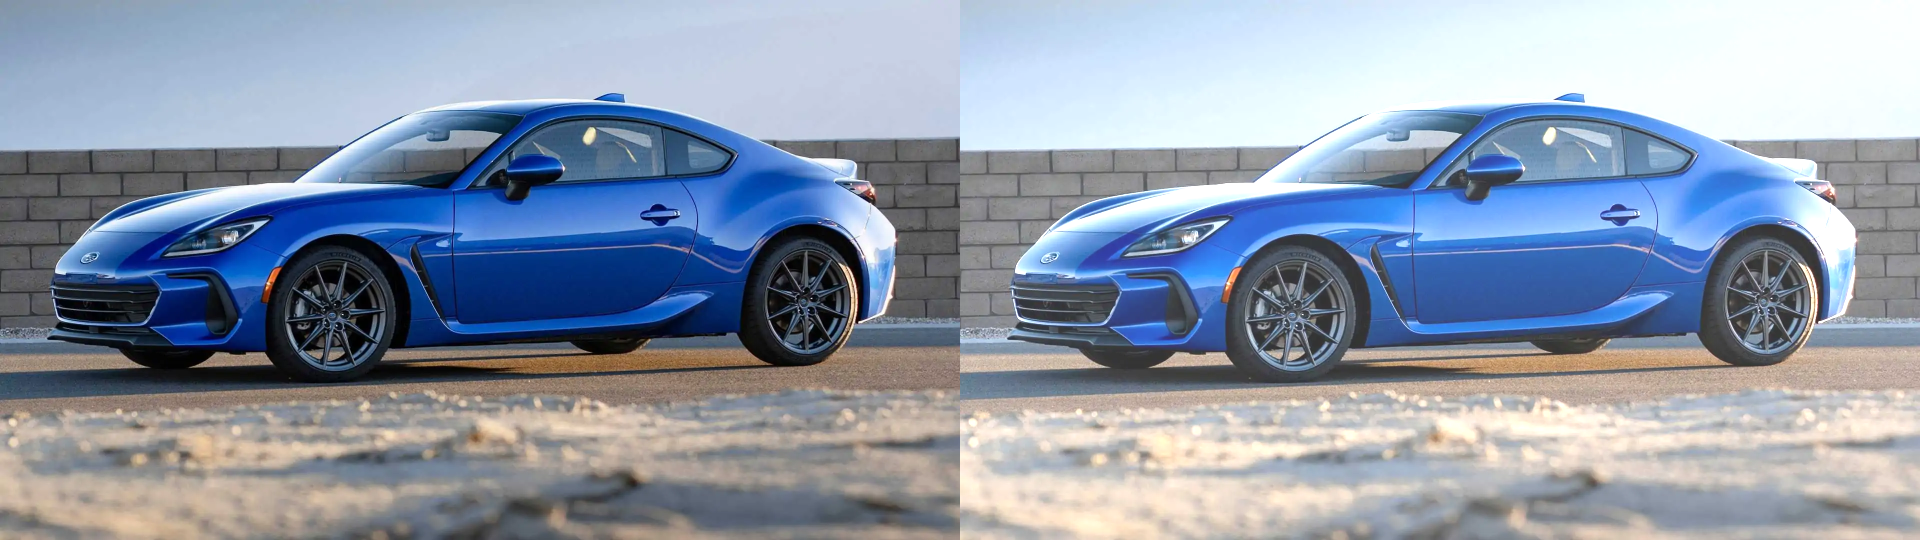

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

brightness = 50
original = cv.imread('/content/drive/MyDrive/Machine Learning/brz.webp')
resized_image = cv.resize(original, (0, 0), fx = 0.5, fy = 0.5)
brightened_image = np.zeros(resized_image.shape, resized_image.dtype)

for y in range(resized_image.shape[0]):
    for x in range(resized_image.shape[1]):
        for c in range(resized_image.shape[2]):
            brightened_image[y, x, c] = np.clip(resized_image[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat([resized_image, brightened_image])
cv2_imshow(final_frame)

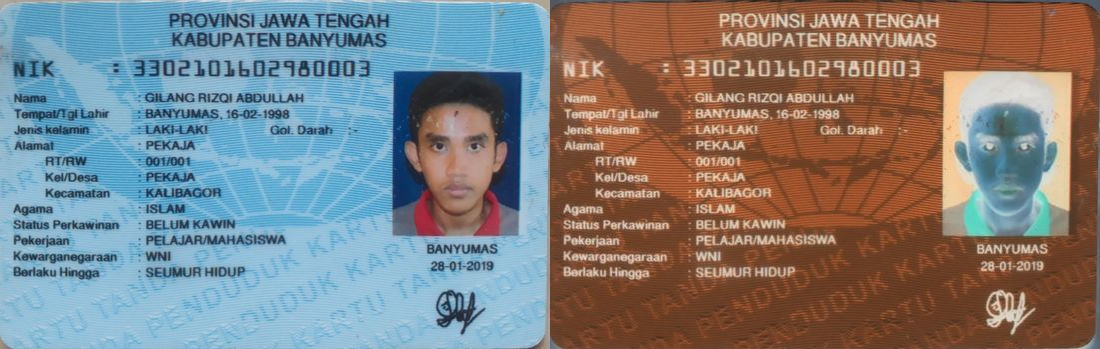

In [3]:
original_ktp = cv.imread('/content/drive/MyDrive/Machine Learning/ktp.jpg')

# equivalent in opencv
# inverted_ktp = cv.bitwise_not(original_ktp)

# manually by inverting each pixels
inverted_ktp = np.zeros(original_ktp.shape, original_ktp.dtype)
for y in range(original_ktp.shape[0]):
    for x in range(original_ktp.shape[1]):
        for c in range(original_ktp.shape[2]):
            inverted_ktp[y, x, c] = 255 - original_ktp[y, x, c]

concatenated_result = cv.hconcat([original_ktp, inverted_ktp])
cv2_imshow(concatenated_result)

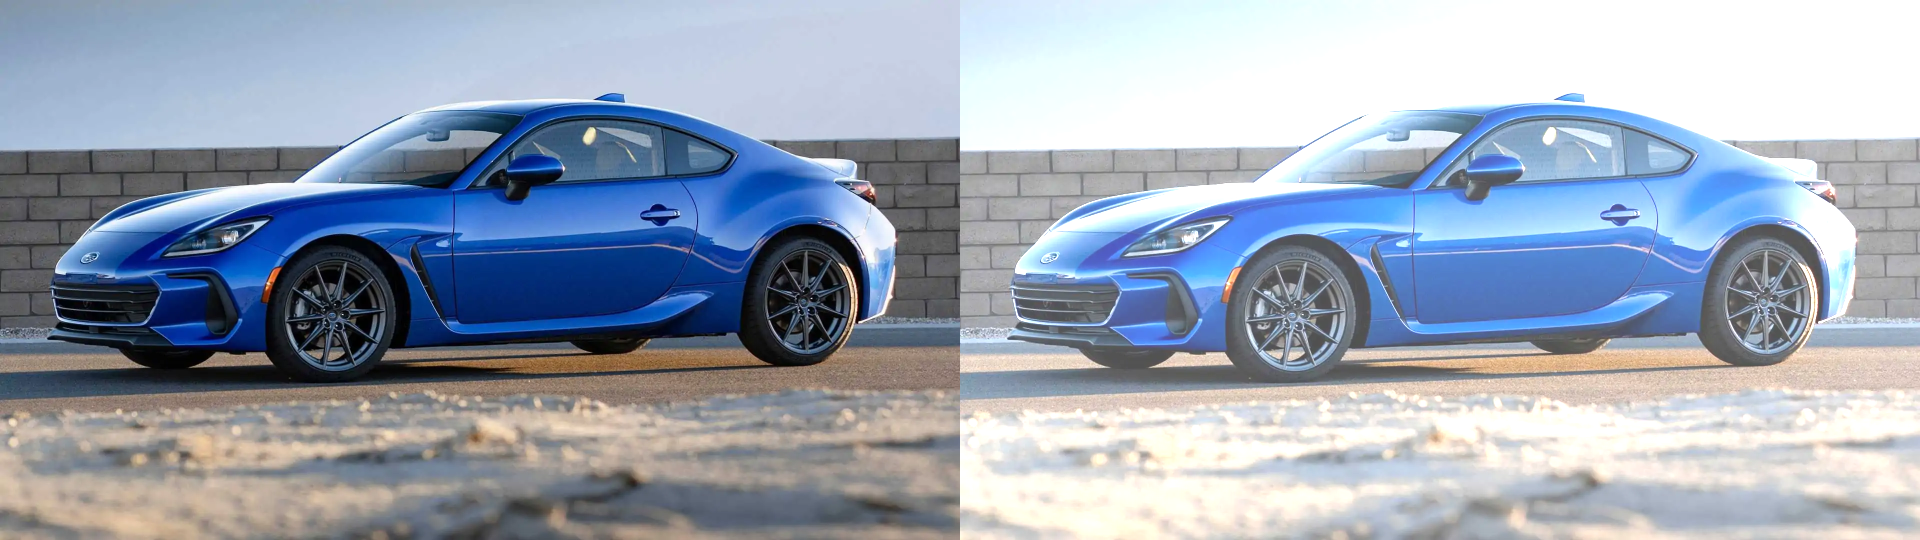

In [4]:
brightness = 80
contrast = 2

brz = cv.imread('/content/drive/MyDrive/Machine Learning/brz.webp')
brz_resized = cv.resize(brz, (0, 0), fx = 0.5, fy = 0.5)

# equivalent in opencv
# brz_contrast = cv.convertScaleAbs(brz, alpha = contrast, beta = brightness)

# manually by converting each pixels to apply brightness and contrast
brz_contrast = np.zeros(brz_resized.shape, brz_resized.dtype)
for y in range(brz_resized.shape[0]):
    for x in range(brz_resized.shape[1]):
        for c in range(brz_resized.shape[2]):
          # apply contrast
          brz_contrast[y, x, c] = np.clip(brz_resized[y, x, c] * contrast, 0, 255)
          # apply brightness
          brz_contrast[y, x, c] = np.clip(brz_resized[y, x, c] + brightness, 0, 255)

concatenated_result = cv.hconcat([brz_resized, brz_contrast])
cv2_imshow(concatenated_result)

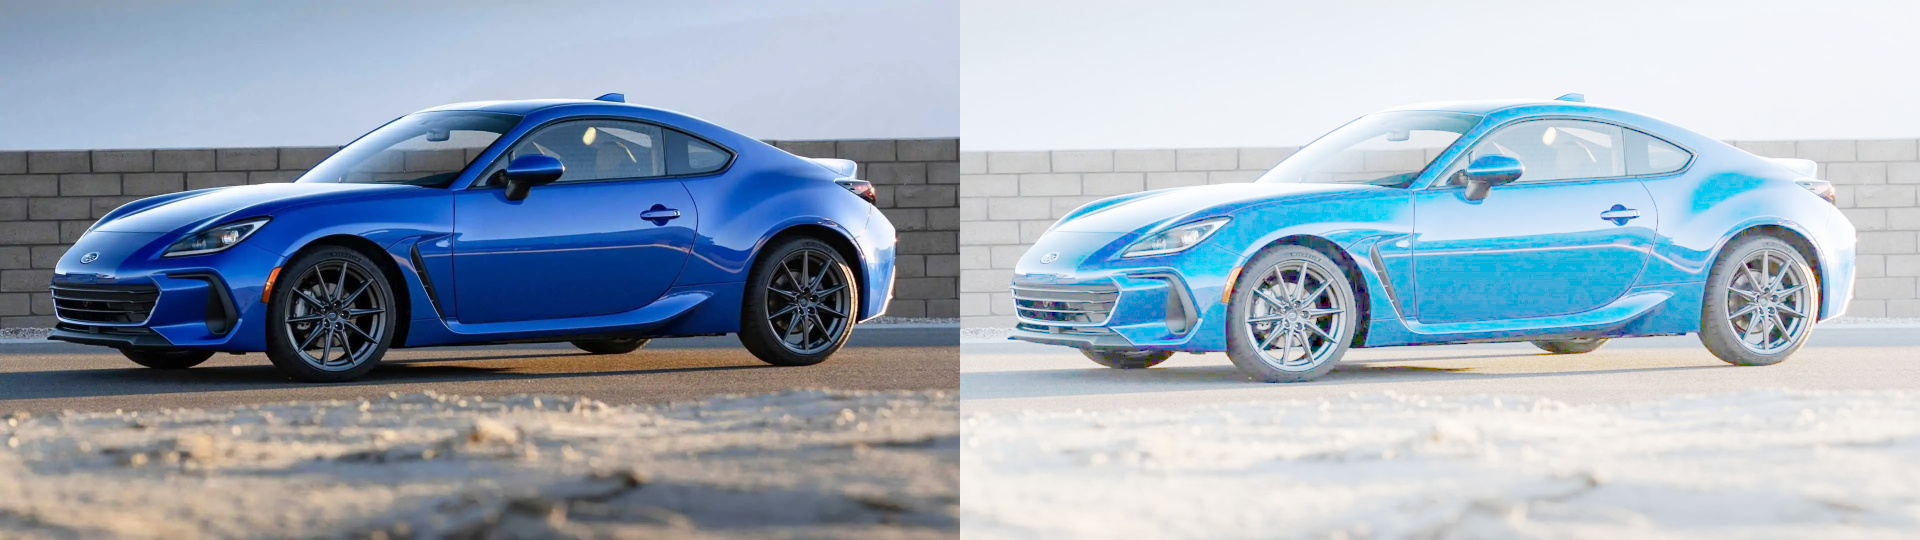

In [5]:
brightness = 80
contrast = 2

brz = cv.imread('/content/drive/MyDrive/Machine Learning/brz.webp')
brz_resized = cv.resize(brz, (0, 0), fx = 0.5, fy = 0.5)

# equivalent in opencv
# brz_contrast = cv.convertScaleAbs(brz, alpha = contrast, beta = brightness)

# manually by converting each pixels to apply brightness and contrast
brz_contrast = np.zeros(brz_resized.shape, brz_resized.dtype)
for y in range(brz_resized.shape[0]):
    for x in range(brz_resized.shape[1]):
        for c in range(brz_resized.shape[2]):
          # apply contrast
          brz_contrast[y, x, c] = np.clip(brz_resized[y, x, c] * contrast, 0, 255)
          # apply logarithmic brightness
          brz_contrast[y, x, c] = np.clip(255 * (np.log(brz_resized[y, x, c] + 1) / np.log(256)), 0, 255)

concatenated_result = cv.hconcat([brz_resized, brz_contrast])
cv2_imshow(concatenated_result)

<ipython-input-8-8a2940d07d71>:15: RuntimeWarning: overflow encountered in scalar add
  ktp_lightness[y, x, c] = (max(ktp[y, x, :]) + min(ktp[y, x, :])) / 2


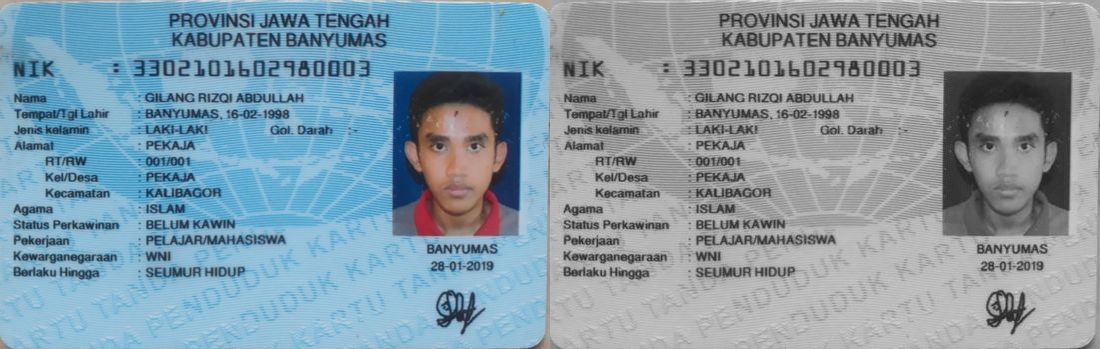

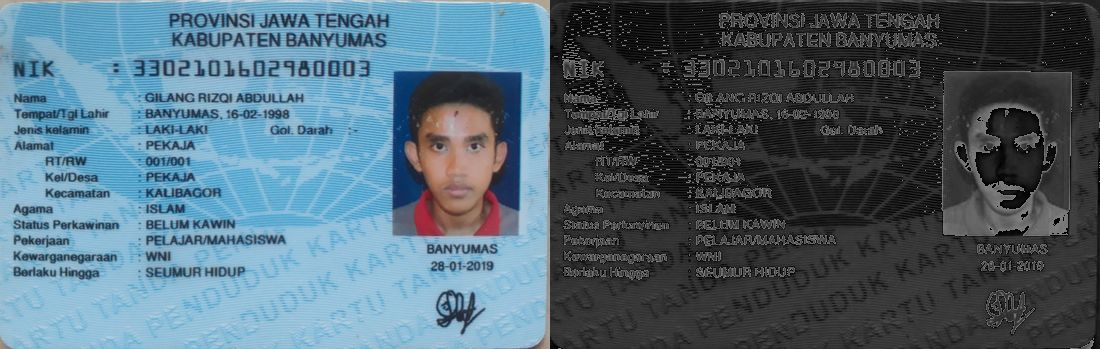

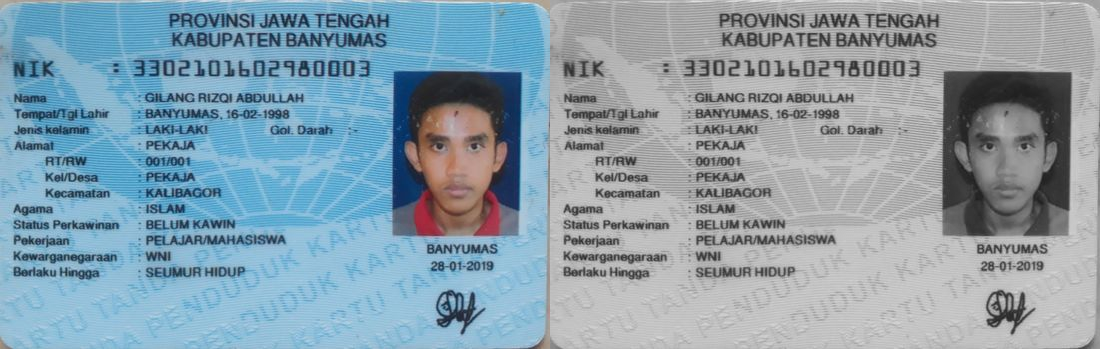

In [8]:
ktp = cv.imread('/content/drive/MyDrive/Machine Learning/ktp.jpg')

# Averaging grayscale
ktp_gray = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp.shape[0]):
    for x in range(ktp.shape[1]):
        for c in range(ktp.shape[2]):
            ktp_gray[y, x, c] = ktp[y, x, :].mean()

# Lightness grayscale
ktp_lightness = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp.shape[0]):
    for x in range(ktp.shape[1]):
        for c in range(ktp.shape[2]):
            ktp_lightness[y, x, c] = (max(ktp[y, x, :]) + min(ktp[y, x, :])) / 2

# Luminance grayscale
ktp_luminance = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp.shape[0]):
    for x in range(ktp.shape[1]):
        for c in range(ktp.shape[2]):
            ktp_luminance[y, x, c] = 0.21 * ktp[y, x, 0] + 0.72 * ktp[y, x, 1] + 0.07 * ktp[y, x, 2]

result_avg = cv.hconcat([ktp, ktp_gray])
result_lightness = cv.hconcat([ktp, ktp_lightness])
result_luminance = cv.hconcat([ktp, ktp_luminance])


cv2_imshow(result_avg)
cv2_imshow(result_lightness)
cv2_imshow(result_luminance)

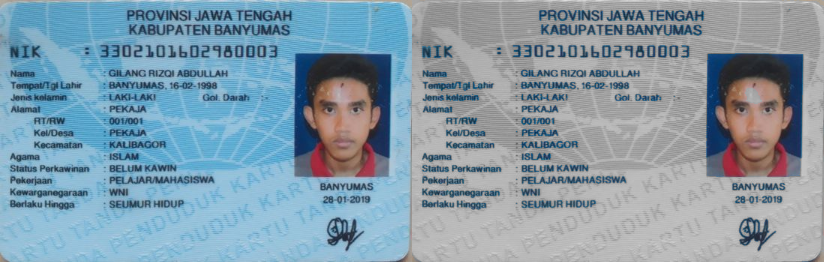

In [41]:
ktp = cv.imread('/content/drive/MyDrive/Machine Learning/ktp.jpg')
ktp_resized = cv.resize(ktp, (0, 0), fx = 0.75, fy = 0.75)

# only grayscale the light blue part
ktp_partial_gray = ktp_resized.copy()
for y in range(ktp_resized.shape[0]):
    for x in range(ktp_resized.shape[1]):
        for c in range(ktp_resized.shape[2]):
            if ktp_resized[y, x, 0] > 150:
              ktp_partial_gray[y, x, c] = ktp_resized[y, x, :].mean()

result = cv.hconcat([ktp_resized, ktp_partial_gray])
cv2_imshow(result)